## K-means clustering
### Advantages: Simple to understand, easily adaptable, works well on small or large datasets, fast, efficient, and performant
### Disadvantages: Need to choose the number of clusters

In [1]:
# Load in the data
import os
import pandas as pd

DATASET_PATH = "datasets/"
DATASET_NAME = "Mall_Customers.csv"
DATASET_URL = DATASET_PATH + DATASET_NAME

def fetch_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

dataset = fetch_data()

def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

dataset = load_data()

In [2]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Unsupervised (there is no y data)
X = dataset.iloc[:, [3, 4]].values

Use K-Means and find the optimal number of clusters for the dataset using the Elbow Method

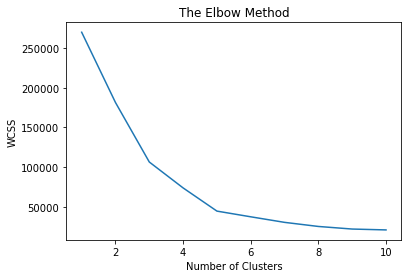

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init = 10, random_state=0)
y_means = kmeans.fit_predict(X)

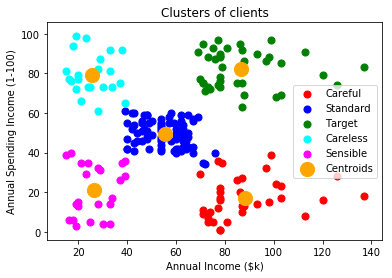

In [14]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s=50, c='red', label="Careful")
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s=50, c='blue', label="Standard")
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s=50, c='green', label="Target")
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s=50, c='cyan', label="Careless")
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s=50, c='magenta', label="Sensible")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='orange', label="Centroids")
plt.title('Clusters of clients')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Annual Spending Income (1-100)')
plt.legend()
plt.show()